In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import time

In [ ]:
(train_X, train_Y_orig), (test_X, test_Y_orig) = tf.keras.datasets.mnist.load_data()
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))/255
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))/255
train_Y = tf.one_hot(train_Y_orig,10)
test_Y = tf.one_hot(test_Y_orig,10)

print(train_X.shape,train_Y.shape)
print(test_X.shape,test_Y.shape)


11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [ ]:
def LeNet5(input_size=(28,28,1)):
    inputs=tf.keras.Input(input_size)
    X = tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5))(inputs)
    X = tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=2)(X)
    X = tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5))(X)
    X = tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=2)(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(units=120,activation='relu')(X)
    X = tf.keras.layers.Dense(units=10,activation='softmax')(X)
    model = tf.keras.Model(inputs=inputs,outputs=X)
    return model


In [ ]:
model = LeNet5()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
start = time.time()
history=model.fit(train_X,train_Y,epochs=15)
end = time.time()
print("Time taken (s) : "+str(end-start))
loss=history.history['loss']
accuracy=history.history['accuracy']

Epoch 1/15
1875/1875 [==============================] - 31s 15ms/step - loss: 0.2400 - accuracy: 0.9290
Epoch 2/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1124 - accuracy: 0.9653
Epoch 3/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0897 - accuracy: 0.9727
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0758 - accuracy: 0.9761
Epoch 5/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0653 - accuracy: 0.9789
Epoch 6/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0579 - accuracy: 0.9814
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0528 - accuracy: 0.9831
Epoch 8/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0475 - accuracy: 0.9851
Epoch 9/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0433 - accuracy: 0.9860
Epoch 10/15
1875/1875 [==============================] - 26s 14m

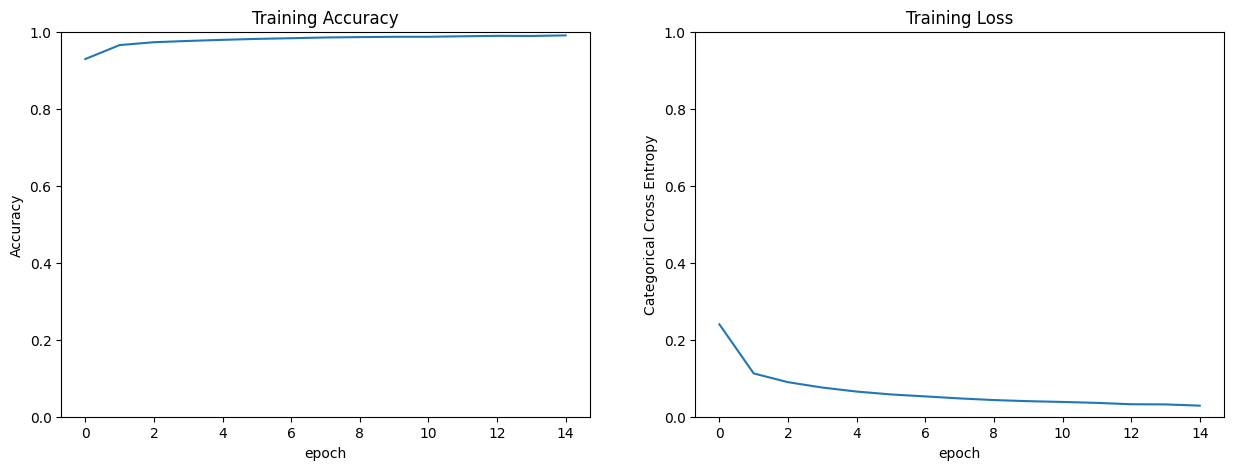

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([0,1])
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0     

In [ ]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 3s 9ms/step - loss: 0.0826 - accuracy: 0.9778


[0.08263574540615082, 0.9778000116348267]

In [ ]:
print(model.trainable_variables)


[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 6) dtype=float32, numpy=
array([[[[-0.16537616, -0.2357705 ,  0.18795425,  0.07121788,
           0.16184714, -0.0408084 ]],

        [[ 0.05448363, -0.09006625, -0.22092426, -0.13027088,
           0.15681206, -0.10855798]],

        [[ 0.01350812,  0.17695467, -0.32758605, -0.10296141,
          -0.16829258,  0.02295405]],

        [[-0.12828885, -0.05780132,  0.04720951, -0.29698762,
          -0.30668288, -0.1549273 ]],

        [[ 0.21358435,  0.08306846,  0.12841998, -0.15882292,
          -0.30109707,  0.09679376]]],


       [[[ 0.02005762, -0.02555372, -0.15891702,  0.02881755,
          -0.01238634,  0.00236945]],

        [[ 0.06668158,  0.33693388, -0.39779925,  0.16504788,
           0.0211423 ,  0.14788963]],

        [[-0.13789846,  0.32267419, -0.3736417 ,  0.0855469 ,
          -0.06887624, -0.06986351]],

        [[-0.18855274,  0.1426335 , -0.22566271, -0.10331684,
          -0.18092081,  0.03142794]],

        [[ 0.295